Correlation can be determined by below methods:
1. Scatter plot of two variables
2. Covariance
3. Pearson's Correlation
4. Spearman's Correlation

Possible correlation:
1. Origin airport and delays
2. Departure date and delays
3. Destination airport and delays
4. Origin/Destination weather and delays

https://www.kaggle.com/threnjen/2019-airline-delays-and-cancellations?select=train_sets_documentation.txt

# Visualization
https://www.kaggle.com/threnjen/dataset-cleanup-how-the-train-test-sets-were-made

### Data loading & Info

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./archive/raw_data/ONTIME_REPORTING_01.csv')

In [3]:
# Descriptive stats for our data
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
count,583985.0,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,567633.000000,567630.000000,567630.000000,...,583851.000000,565963.000000,583985.000000,583985.000000,105222.000000,105222.000000,105222.000000,105222.000000,105222.000000,0.0
mean,1.0,15.960088,3.835626,2537.869334,12659.701982,12659.470015,1326.266642,1331.957814,13.258226,0.174281,...,143.557401,138.610077,797.742767,3.664861,20.106080,4.428551,18.508392,0.079508,24.950590,NaN
std,0.0,8.987942,1.921899,1821.736145,1519.405493,1519.336466,484.081000,495.404020,47.507390,0.379351,...,73.216303,73.078565,589.999261,2.323890,65.762202,38.535323,41.726392,3.203342,50.851973,NaN
min,1.0,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,0.000000,0.000000,...,20.000000,16.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.0,8.000000,2.000000,979.000000,11292.000000,11292.000000,917.000000,921.000000,0.000000,0.000000,...,90.000000,85.000000,363.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.0,16.000000,4.000000,2114.000000,12889.000000,12889.000000,1320.000000,1328.000000,0.000000,0.000000,...,125.000000,121.000000,640.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,NaN
75%,1.0,24.000000,5.000000,3902.000000,13931.000000,13931.000000,1730.000000,1738.000000,5.000000,0.000000,...,175.000000,170.000000,1037.000000,5.000000,16.000000,0.000000,21.000000,0.000000,29.000000,NaN
max,1.0,31.000000,7.000000,7439.000000,16218.000000,16218.000000,2359.000000,2400.000000,1651.000000,1.000000,...,703.000000,737.000000,4983.000000,11.000000,1638.000000,1416.000000,1447.000000,816.000000,1514.000000,NaN


In [4]:
# Check our missing data
df.isna().sum()

MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                 2543
OP_CARRIER_FL_NUM           0
ORIGIN_AIRPORT_ID           0
ORIGIN                      0
ORIGIN_CITY_NAME            0
DEST_AIRPORT_ID             0
DEST                        0
DEST_CITY_NAME              0
CRS_DEP_TIME                0
DEP_TIME                16352
DEP_DELAY_NEW           16355
DEP_DEL15               16355
DEP_TIME_BLK                0
CRS_ARR_TIME                0
ARR_TIME                17061
ARR_DELAY_NEW           18022
ARR_TIME_BLK                0
CANCELLED                   0
CANCELLATION_CODE      567259
CRS_ELAPSED_TIME          134
ACTUAL_ELAPSED_TIME     18022
DISTANCE                    0
DISTANCE_GROUP              0
CARRIER_DELAY          478763
WEATHER_DELAY          478763
NAS_DELAY              478763
SECURITY_DELAY         478763
LATE_AIRCRAFT_DELAY    478763
Unnamed: 32            583985
dtype: int

### Loading Data for Merging

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [5]:
# coordinates of airports
coords = pd.read_csv('./archive/raw_data/AIRPORT_COORDINATES.csv')
coords.drop_duplicates(subset='ORIGIN_AIRPORT_ID', inplace=True) # Remove duplicates on specific column(s)
coords.dtypes

ORIGIN_AIRPORT_ID         int64
DISPLAY_AIRPORT_NAME     object
LATITUDE                float64
LONGITUDE               float64
dtype: object

In [6]:
# proper names of carriers for better EDA usage
names = pd.read_csv("./archive/raw_data/CARRIER_DECODE.csv")
names.drop_duplicates(inplace=True)
names.drop_duplicates(subset=['OP_UNIQUE_CARRIER'], inplace=True)
names.dtypes

AIRLINE_ID            int64
OP_UNIQUE_CARRIER    object
CARRIER_NAME         object
dtype: object

In [7]:
# Weather report for top 90% of airport cities, in 2019
weather_report = pd.read_csv('./archive/raw_data/airport_weather_2019.csv')
weather_report.dtypes

STATION     object
NAME        object
DATE        object
AWND       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
WDF2       float64
WDF5       float64
WSF2       float64
WSF5       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WESD       float64
WT10       float64
PSUN       float64
TSUN       float64
SN32       float64
SX32       float64
TOBS       float64
WT11       float64
dtype: object

In [9]:
# Cities 
cities = pd.read_csv('./archive/raw_data/airports_list.csv')
cities.dtypes

ORIGIN_AIRPORT_ID        int64
DISPLAY_AIRPORT_NAME    object
ORIGIN_CITY_NAME        object
NAME                    object
dtype: object

In [10]:
# Connect our weather report with the city names
weather_merge = pd.merge(cities, weather_report, how='left', on='NAME')
weather_merge.dtypes

ORIGIN_AIRPORT_ID         int64
DISPLAY_AIRPORT_NAME     object
ORIGIN_CITY_NAME         object
NAME                     object
STATION                  object
DATE                     object
AWND                    float64
PGTM                    float64
PRCP                    float64
SNOW                    float64
SNWD                    float64
TAVG                    float64
TMAX                    float64
TMIN                    float64
WDF2                    float64
WDF5                    float64
WSF2                    float64
WSF5                    float64
WT01                    float64
WT02                    float64
WT03                    float64
WT04                    float64
WT05                    float64
WT06                    float64
WT07                    float64
WT08                    float64
WT09                    float64
WESD                    float64
WT10                    float64
PSUN                    float64
TSUN                    float64
SN32    

In [11]:
# Get just the important metrics from the weather report (date, precipitation, snow, temp, wind)
weather = weather_merge[['ORIGIN_AIRPORT_ID', 'DATE', 'AWND', 'PRCP', 'SNOW', 'TMAX', 'TAVG']]
# Drop any rows where no weather was recorded
weather.drop(weather.loc[weather['ORIGIN_AIRPORT_ID'].isna()].index, axis=0, inplace=True)

/Users/tracyliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
weather.isna().sum()

ORIGIN_AIRPORT_ID        0
DATE                     1
AWND                     9
PRCP                    22
SNOW                 11060
TMAX                     6
TAVG                  7013
dtype: int64

In [13]:
# Impute mean in nan rows for temp and wind
weather['TMAX'].fillna(round(weather.groupby('ORIGIN_AIRPORT_ID')['TMAX'].transform('mean'), 1), inplace=True)
weather['PRCP'].fillna(round(weather.groupby('ORIGIN_AIRPORT_ID')['PRCP'].transform('mean'), 1), inplace=True)
weather['AWND'].fillna(round(weather.groupby('ORIGIN_AIRPORT_ID')['AWND'].transform('mean'), 1), inplace=True)
# weather.fillna(0, inplace=True)

/Users/tracyliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
# Cast data types to datetime so we can get the month and day of month to match up with main df
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['MONTH'] = pd.DatetimeIndex(weather['DATE']).month
weather['DAY_OF_MONTH'] = pd.DatetimeIndex(weather['DATE']).day

<ipython-input-14-0637edebb7e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['DATE'] = pd.to_datetime(weather['DATE'])
<ipython-input-14-0637edebb7e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['MONTH'] = pd.DatetimeIndex(weather['DATE']).month
<ipython-input-14-0637edebb7e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [15]:
weather.dtypes

ORIGIN_AIRPORT_ID             int64
DATE                 datetime64[ns]
AWND                        float64
PRCP                        float64
SNOW                        float64
TMAX                        float64
TAVG                        float64
MONTH                       float64
DAY_OF_MONTH                float64
dtype: object

In [16]:
# coordinates of airports
aircraft = pd.read_csv('./archive/raw_data/B43_AIRCRAFT_INVENTORY.csv', encoding='latin1')
aircraft.drop_duplicates(subset='TAIL_NUM', inplace=True) # Remove duplicates on specific column(s)
aircraft.dtypes

MANUFACTURE_YEAR      int64
TAIL_NUM             object
NUMBER_OF_SEATS     float64
dtype: object

In [17]:
def data_merge_by_month(monthly_data, aircraft, coords, names, weather):

    # drop rows with no departure time, tail number, or were cancelled
    print("Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.")
    monthly_data.drop(monthly_data.loc[monthly_data['DEP_TIME'].isna()].index, axis=0, inplace=True)
    monthly_data.drop(monthly_data.loc[monthly_data['TAIL_NUM'].isna()].index, axis=0, inplace=True)
    monthly_data.drop(monthly_data.loc[monthly_data['CANCELLED']==1].index, axis=0, inplace=True)   
        
    # List flight segment number for daily flight segments by tracking tail number
    print("\nAdding Flight Number Sequence - SEGMENT_NUMBER")
    monthly_data["SEGMENT_NUMBER"] = monthly_data.groupby(["TAIL_NUM", 'DAY_OF_MONTH'])["DEP_TIME"].rank("dense", ascending=True)    
    
    # Merge proper carrier name
    print("\nApplying Carrier Names - CARRIER_NAME")  
    monthly_data = pd.merge(monthly_data, names, how='inner', on=['OP_UNIQUE_CARRIER'])
    
    # Add monthly flight statistics for carrier and airport
    print("\nAdding flight statistics for carrier and airport - AIRPORT_FLIGHTS_MONTH")
    monthly_data['AIRPORT_FLIGHTS_MONTH'] = monthly_data.groupby(['ORIGIN_AIRPORT_ID'])['ORIGIN_CITY_NAME'].transform('count')
   
    # Calculate age of plane
    print("\nCalculate Fleet Age - PLANE_AGE")
    monthly_data = pd.merge(monthly_data, aircraft, how='left', on=['TAIL_NUM'])
    monthly_data['MANUFACTURE_YEAR'].fillna((monthly_data['MANUFACTURE_YEAR'].mean()), inplace=True)
    monthly_data['PLANE_AGE'] = 2019 - monthly_data['MANUFACTURE_YEAR']
    
    # Merge "Origin" airport coordinates
    print("\nAdding airport coordinates - LATITUDE, LONGITUDE, DEPARTING_AIRPORT")
    monthly_data = pd.merge(monthly_data, coords, how='inner', on=['ORIGIN_AIRPORT_ID'])
    monthly_data['LATITUDE'] = round(monthly_data['LATITUDE'], 3)
    monthly_data['LONGITUDE'] = round(monthly_data['LONGITUDE'], 3)
    
    # Get previous airport for tail number
    print("\nAdding airports - PREVIOUS_AIRPORT")
    segment_temp = monthly_data[["DAY_OF_MONTH", "TAIL_NUM", "DISPLAY_AIRPORT_NAME", "SEGMENT_NUMBER"]]
    monthly_data = pd.merge_asof(monthly_data.sort_values('SEGMENT_NUMBER'), segment_temp.sort_values('SEGMENT_NUMBER'), on='SEGMENT_NUMBER', by=['DAY_OF_MONTH', 'TAIL_NUM'], allow_exact_matches=False)
    monthly_data['DISPLAY_AIRPORT_NAME_y'].fillna('NONE', inplace=True)
    monthly_data.rename(columns={"DISPLAY_AIRPORT_NAME_y": "PREVIOUS_AIRPORT", "DISPLAY_AIRPORT_NAME_x": "DEPARTING_AIRPORT"}, inplace=True)      
    
    # Drop airports below the 10th percentile
    print("\nDropping bottom 10% of airports")
    monthly_data.drop(monthly_data.loc[monthly_data['AIRPORT_FLIGHTS_MONTH'] < 1100].index, axis=0, inplace=True)    
    
    # Merge weather data
    print("\nAdding daily weather data - PRCP, SNOW, TMAX, TAVG, AWND")
    monthly_data = pd.merge(monthly_data, weather, how='inner', on=['ORIGIN_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])    
    
       
    monthly_data = monthly_data[["AIRLINE_ID", "CARRIER_NAME",
                                 "ORIGIN_AIRPORT_ID", "ORIGIN", "ORIGIN_CITY_NAME", "PREVIOUS_AIRPORT", "LATITUDE", "LONGITUDE",
                                 "MONTH", "DAY_OF_MONTH", "AIRPORT_FLIGHTS_MONTH", 
                                 "SEGMENT_NUMBER", "TAIL_NUM", 
                                 "MANUFACTURE_YEAR", "PLANE_AGE", 
                                 "AWND", "PRCP", "SNOW", "TMAX", "TAVG",
                                 "DEST_AIRPORT_ID", "DEST", "DEST_CITY_NAME", "DEPARTING_AIRPORT",
                                 "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY_NEW", 
                                 "CRS_ARR_TIME", "ARR_TIME", "ARR_DELAY_NEW", 
                                 "CANCELLED", "DISTANCE", 
                                 "CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"
                                 ]]
    
    
    # ARR_DELAY
#     if monthly_data["ARR_DELAY"] == 0:
#         monthly_data[["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]] = 0
    
    # specify data types of various fields to reduce memory usage
    print("\nCleaning up data types")
#    monthly_data['MONTH'] = monthly_data['MONTH'].astype('object')
#    monthly_data['DAY_OF_MONTH'] = monthly_data['DAY_OF_MONTH'].astype('object')
    monthly_data['SEGMENT_NUMBER'] = monthly_data['SEGMENT_NUMBER'].astype('int8')
    monthly_data['AIRPORT_FLIGHTS_MONTH'] = monthly_data['AIRPORT_FLIGHTS_MONTH'].astype('int64')
    monthly_data['PLANE_AGE'] = monthly_data['PLANE_AGE'].astype('int32')

    monthly_data.reset_index(inplace=True, drop=True)
    
    return monthly_data

In [18]:
df = pd.read_csv('./archive/raw_data/ONTIME_REPORTING_01.csv')
month01 = data_merge_by_month(df, aircraft, coords, names, weather)

Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.

Adding Flight Number Sequence - SEGMENT_NUMBER

Applying Carrier Names - CARRIER_NAME

Adding flight statistics for carrier and airport - AIRPORT_FLIGHTS_MONTH

Calculate Fleet Age - PLANE_AGE

Adding airport coordinates - LATITUDE, LONGITUDE, DEPARTING_AIRPORT

Adding airports - PREVIOUS_AIRPORT

Dropping bottom 10% of airports

Adding daily weather data - PRCP, SNOW, TMAX, TAVG, AWND

Cleaning up data types


In [19]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
month01[:1]

,AIRLINE_ID,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,PREVIOUS_AIRPORT,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,AIRPORT_FLIGHTS_MONTH,SEGMENT_NUMBER,TAIL_NUM,MANUFACTURE_YEAR,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEPARTING_AIRPORT,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,19805,American Airlines Inc.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N509AY,2009.0,10,3.36,0.0,NaN,74.0,58.0,13930,ORD,"Chicago, IL",Phoenix Sky Harbor International,800,759.0,0.0,1226,1228.0,2.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
month01.dtypes

AIRLINE_ID                 int64
CARRIER_NAME              object
ORIGIN_AIRPORT_ID          int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
PREVIOUS_AIRPORT          object
LATITUDE                 float64
LONGITUDE                float64
MONTH                      int64
DAY_OF_MONTH               int64
AIRPORT_FLIGHTS_MONTH      int64
SEGMENT_NUMBER              int8
TAIL_NUM                  object
MANUFACTURE_YEAR         float64
PLANE_AGE                  int32
AWND                     float64
PRCP                     float64
SNOW                     float64
TMAX                     float64
TAVG                     float64
DEST_AIRPORT_ID            int64
DEST                      object
DEST_CITY_NAME            object
DEPARTING_AIRPORT         object
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY_NEW            float64
CRS_ARR_TIME               int64
ARR_TIME                 float64
ARR_DELAY_NEW            float64
CANCELLED 

In [21]:
month01 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_01.csv'), aircraft, coords, names, weather)
month02 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_02.csv'), aircraft, coords, names, weather)
month03 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_03.csv'), aircraft, coords, names, weather)
month04 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_04.csv'), aircraft, coords, names, weather)
month05 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_05.csv'), aircraft, coords, names, weather)
month06 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_06.csv'), aircraft, coords, names, weather)
month07 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_07.csv'), aircraft, coords, names ,weather)
month08 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_08.csv'), aircraft, coords, names, weather)
month09 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_09.csv'), aircraft, coords, names, weather)
month10 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_10.csv'), aircraft, coords, names, weather)
month11 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_11.csv'), aircraft, coords, names, weather)
month12 = data_merge_by_month(pd.read_csv('./archive/raw_data/ONTIME_REPORTING_12.csv'), aircraft, coords, names, weather)

combined = pd.concat([month01, month02, month03, month04, month05, month06, month07, month08, month09, month10, month11, month12])
#combined.to_csv('./Data/train_2019.csv', index=False)

Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.

Adding Flight Number Sequence - SEGMENT_NUMBER

Applying Carrier Names - CARRIER_NAME

Adding flight statistics for carrier and airport - AIRPORT_FLIGHTS_MONTH

Calculate Fleet Age - PLANE_AGE

Adding airport coordinates - LATITUDE, LONGITUDE, DEPARTING_AIRPORT

Adding airports - PREVIOUS_AIRPORT

Dropping bottom 10% of airports

Adding daily weather data - PRCP, SNOW, TMAX, TAVG, AWND

Cleaning up data types
Dropping NaNs from Dep Time, Tail Num. Dropping Cancellations.

Adding Flight Number Sequence - SEGMENT_NUMBER

Applying Carrier Names - CARRIER_NAME

Adding flight statistics for carrier and airport - AIRPORT_FLIGHTS_MONTH

Calculate Fleet Age - PLANE_AGE

Adding airport coordinates - LATITUDE, LONGITUDE, DEPARTING_AIRPORT

Adding airports - PREVIOUS_AIRPORT

Dropping bottom 10% of airports

Adding daily weather data - PRCP, SNOW, TMAX, TAVG, AWND

Cleaning up data types
Dropping NaNs from Dep Time, Tail Num. Droppin

In [22]:
combined.shape

(6538637, 38)

### Top 30 airport in the US (Filter: ORIGIN & DEST)

In [23]:
# ATL - Hartsfield-Jackson Atlanta Intl
# BOS - Boston Logan Intl
# BWI - Baltimore/Washington Intl
# CLT - Charlotte Douglas Intl
# DCA - Ronald Reagan Washington National
# DEN - Denver Intl
# DFW - Dallas/Fort Worth Intl
# DTW - Detroit Metropolitan Wayne County
# EWR - Newark Liberty Intl
# FLL - Fort Lauderdale/Hollywood Intl
# HNL - Honolulu Intl
# IAD - Washington Dulles Intl
# IAH - George Bush Houston Intercontinental
# JFK - New York John F. Kennedy Intl
# LAS - Las Vegas McCarran Intl
# LAX - Los Angeles Intl
# LGA - New York LaGuardia
# MCO - Orlando Intl
# MDW - Chicago Midway
# MEM - Memphis Intl
# MIA - Miami Intl
# MSP - Minneapolis/St. Paul Intl
# ORD - Chicago O Hare Intl
# PHL - Philadelphia Intl
# PHX - Phoenix Sky Harbor Intl
# SAN - San Diego Intl
# SEA - Seattle/Tacoma Intl
# SFO - San Francisco Intl
# SLC - Salt Lake City Intl
# TPA - Tampa Intl

In [24]:
Top30 = ['ATL', 'BOS', 'BWI', 'CLT', 'DCA', 'DEN', 'DFW', 'DTW', 'EWR', 'FLL', 'HNL', 'IAD', 'IAH', 'JFK', 'LAS', 'LAX', 'LGA', 'MCO', 'MDW', 'MEM', 'MIA', 'MSP',
        'ORD', 'PHL', 'PHX', 'SAN', 'SEA', 'SFO', 'SLC', 'TPA']

In [25]:
# ORIGIN
pre = combined['ORIGIN']==Top30[0]
for i in range(1,len(Top30)):
    post = combined['ORIGIN']==Top30[i]
    pre = np.logical_or(pre, post)
combined_top30_origin = combined[pre]

# DEST
pre = combined_top30_origin['DEST']==Top30[0]
for i in range(1,len(Top30)):
    post = combined_top30_origin['DEST']==Top30[i]
    pre = np.logical_or(pre, post)    
combined_top30 = combined_top30_origin[pre]

In [26]:
combined_top30.shape

(2451810, 38)

<AxesSubplot:>

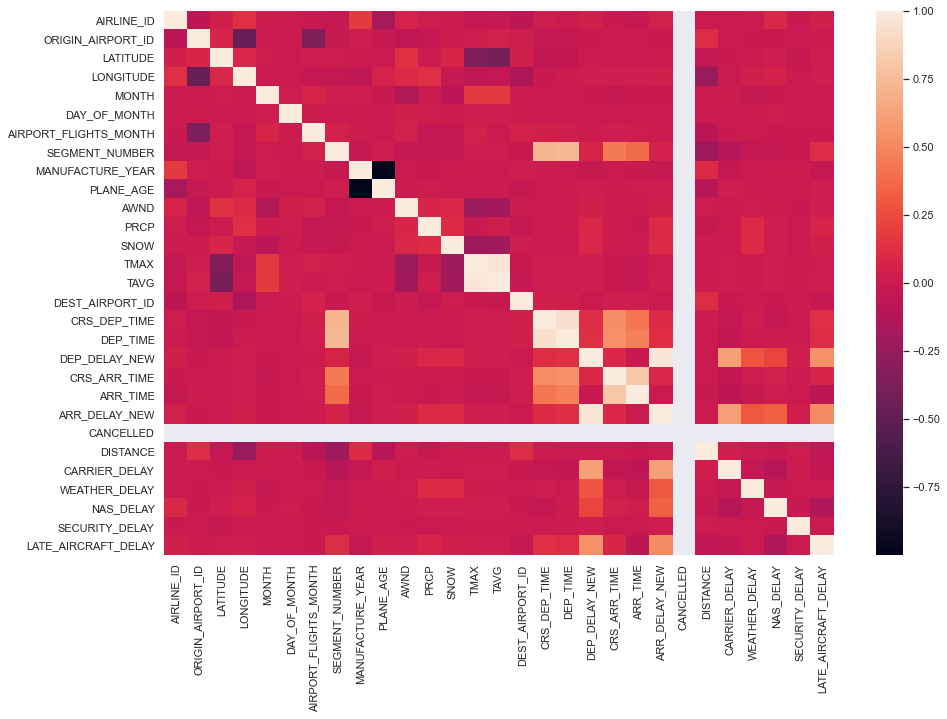

In [27]:
import seaborn as sns
sns.set(font_scale=40)  # crazy big
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(combined_top30.corr())

In [28]:
combined_top30

,AIRLINE_ID,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,PREVIOUS_AIRPORT,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,AIRPORT_FLIGHTS_MONTH,SEGMENT_NUMBER,TAIL_NUM,MANUFACTURE_YEAR,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEPARTING_AIRPORT,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,19805,American Airlines Inc.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N509AY,2009.0,10,3.36,0.0,NaN,74.0,58.0,13930,ORD,"Chicago, IL",Phoenix Sky Harbor International,800,759.0,0.0,1226,1228.0,2.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN
6,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N8706W,2017.0,2,3.36,0.0,NaN,74.0,58.0,13232,MDW,"Chicago, IL",Phoenix Sky Harbor International,715,810.0,55.0,1130,1213.0,43.0,0.0,1444.0,NaN,43.0,0.0,0.0,0.0,0.0
7,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N469WN,2004.0,15,3.36,0.0,NaN,74.0,58.0,14679,SAN,"San Diego, CA",Phoenix Sky Harbor International,710,703.0,0.0,725,710.0,0.0,0.0,304.0,NaN,NaN,NaN,NaN,NaN,NaN
8,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N713SW,1998.0,21,3.36,0.0,NaN,74.0,58.0,14869,SLC,"Salt Lake City, UT",Phoenix Sky Harbor International,755,749.0,0.0,930,914.0,0.0,0.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN
10,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N8321D,2012.0,7,3.36,0.0,NaN,74.0,58.0,14771,SFO,"San Francisco, CA",Phoenix Sky Harbor International,1005,1000.0,0.0,1130,1111.0,0.0,0.0,651.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530215,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",El Paso International,29.983,-95.340,12,19,15165,6,N88327,2015.0,4,10.07,0.0,NaN,85.0,78.0,11298,DFW,"Dallas/Fort Worth, TX",Houston Intercontinental,2005,2012.0,7.0,2129,2133.0,4.0,0.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
530216,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Charleston International,29.983,-95.340,12,19,15165,6,N85340,2016.0,3,10.07,0.0,NaN,85.0,78.0,13244,MEM,"Memphis, TN",Houston Intercontinental,1945,1942.0,0.0,2127,2101.0,0.0,0.0,468.0,NaN,NaN,NaN,NaN,NaN,NaN
530217,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Pittsburgh International,29.983,-95.340,12,19,15165,6,N518LR,2006.0,13,10.07,0.0,NaN,85.0,78.0,10397,ATL,"Atlanta, GA",Houston Intercontinental,1805,1802.0,0.0,2109,2049.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN,NaN
530220,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Norfolk International,29.983,-95.340,12,19,15165,6,N87318,2014.0,5,10.07,0.0,NaN,85.0,78.0,13487,MSP,"Minneapolis, MN",Houston Intercontinental,1940,1937.0,0.0,2236,2205.0,0.0,0.0,1034.0,NaN,NaN,NaN,NaN,NaN,NaN


### Reporting carriers (Filter: CARRIER_Nto_numpy

In [29]:
# AirTran
# Alaska VVV
# America West
# American VVV
# American Eagle VVV
# Atlantic Southeast VVV
# Comair VVV
# Continental
# Delta VVV
# ExpressJet Airlines d/b/a Continental Express
# Frontier VVV
# JetBlue VVV
# Mesa Airlines VVV
# Northwest
# Pinnacle Airlines d/b/a Northwest Airlink
# SkyWest VVV
# Southwest VVV
# United VVV
# US Airways

In [30]:
len(np.unique(combined_top30["CARRIER_NAME"]))

17

In [31]:
np.unique(combined_top30["CARRIER_NAME"])

array(['Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.',
       'American Eagle Airlines Inc.', 'Atlantic Southeast Airlines',
       'Comair Inc.', 'Delta Air Lines Inc.', 'Endeavor Air Inc.',
       'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.',
       'JetBlue Airways', 'Mesa Airlines Inc.', 'Midwest Airline, Inc.',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
       'Spirit Air Lines', 'United Air Lines Inc.'], dtype=object)

In [32]:
carriers = ['Alaska Airlines Inc.', 'American Airlines Inc.', 'American Eagle Airlines Inc.', 
            'Atlantic Southeast Airlines', 'Comair Inc.', 'Delta Air Lines Inc.', 
            'Frontier Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.', 
            'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'United Air Lines Inc.']

In [33]:
carriers_ID = [19930, 19805, 20398, 
               20366, 20417, 19790, 
               20436, 20409, 20378, 
               20304, 19393, 19977]

In [34]:
len(carriers_ID)

12

In [35]:
# Carrier ID
pre = combined_top30['AIRLINE_ID']==carriers_ID[0]
for i in range(1,len(carriers_ID)):
    post = combined_top30['AIRLINE_ID']==carriers_ID[i]
    pre = np.logical_or(pre, post)    
combined_result = combined_top30[pre]

In [36]:
combined_result.shape

(2216748, 38)

In [37]:
combined_result.to_csv('./Data/train_2019.csv', index=False)

In [38]:
combined_result

,AIRLINE_ID,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,PREVIOUS_AIRPORT,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,AIRPORT_FLIGHTS_MONTH,SEGMENT_NUMBER,TAIL_NUM,MANUFACTURE_YEAR,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEPARTING_AIRPORT,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,19805,American Airlines Inc.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N509AY,2009.0,10,3.36,0.0,NaN,74.0,58.0,13930,ORD,"Chicago, IL",Phoenix Sky Harbor International,800,759.0,0.0,1226,1228.0,2.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN
6,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N8706W,2017.0,2,3.36,0.0,NaN,74.0,58.0,13232,MDW,"Chicago, IL",Phoenix Sky Harbor International,715,810.0,55.0,1130,1213.0,43.0,0.0,1444.0,NaN,43.0,0.0,0.0,0.0,0.0
7,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N469WN,2004.0,15,3.36,0.0,NaN,74.0,58.0,14679,SAN,"San Diego, CA",Phoenix Sky Harbor International,710,703.0,0.0,725,710.0,0.0,0.0,304.0,NaN,NaN,NaN,NaN,NaN,NaN
8,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N713SW,1998.0,21,3.36,0.0,NaN,74.0,58.0,14869,SLC,"Salt Lake City, UT",Phoenix Sky Harbor International,755,749.0,0.0,930,914.0,0.0,0.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN
10,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N8321D,2012.0,7,3.36,0.0,NaN,74.0,58.0,14771,SFO,"San Francisco, CA",Phoenix Sky Harbor International,1005,1000.0,0.0,1130,1111.0,0.0,0.0,651.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530215,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",El Paso International,29.983,-95.340,12,19,15165,6,N88327,2015.0,4,10.07,0.0,NaN,85.0,78.0,11298,DFW,"Dallas/Fort Worth, TX",Houston Intercontinental,2005,2012.0,7.0,2129,2133.0,4.0,0.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
530216,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Charleston International,29.983,-95.340,12,19,15165,6,N85340,2016.0,3,10.07,0.0,NaN,85.0,78.0,13244,MEM,"Memphis, TN",Houston Intercontinental,1945,1942.0,0.0,2127,2101.0,0.0,0.0,468.0,NaN,NaN,NaN,NaN,NaN,NaN
530217,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Pittsburgh International,29.983,-95.340,12,19,15165,6,N518LR,2006.0,13,10.07,0.0,NaN,85.0,78.0,10397,ATL,"Atlanta, GA",Houston Intercontinental,1805,1802.0,0.0,2109,2049.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN,NaN
530220,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Norfolk International,29.983,-95.340,12,19,15165,6,N87318,2014.0,5,10.07,0.0,NaN,85.0,78.0,13487,MSP,"Minneapolis, MN",Houston Intercontinental,1940,1937.0,0.0,2236,2205.0,0.0,0.0,1034.0,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
combined_result.isna().sum()

AIRLINE_ID                     0
CARRIER_NAME                   0
ORIGIN_AIRPORT_ID              0
ORIGIN                         0
ORIGIN_CITY_NAME               0
PREVIOUS_AIRPORT               0
LATITUDE                       0
LONGITUDE                      0
MONTH                          0
DAY_OF_MONTH                   0
AIRPORT_FLIGHTS_MONTH          0
SEGMENT_NUMBER                 0
TAIL_NUM                       0
MANUFACTURE_YEAR               0
PLANE_AGE                      0
AWND                           0
PRCP                           0
SNOW                      722819
TMAX                           0
TAVG                      101956
DEST_AIRPORT_ID                0
DEST                           0
DEST_CITY_NAME                 0
DEPARTING_AIRPORT              0
CRS_DEP_TIME                   0
DEP_TIME                       0
DEP_DELAY_NEW                  0
CRS_ARR_TIME                   0
ARR_TIME                     551
ARR_DELAY_NEW               6166
CANCELLED 

In [40]:
combined_result.describe()

,AIRLINE_ID,ORIGIN_AIRPORT_ID,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,AIRPORT_FLIGHTS_MONTH,SEGMENT_NUMBER,MANUFACTURE_YEAR,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,1.493929e+06,2.216748e+06,2.114792e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216748e+06,2.216197e+06,2.210582e+06,2216748.0,2.216748e+06,477323.000000,477323.000000,477323.000000,477323.000000,477323.000000
mean,1.986947e+04,1.267139e+04,3.692980e+01,-9.370922e+01,6.500208e+00,1.573700e+01,1.551517e+04,2.656371e+00,2.007694e+03,1.129813e+01,8.455653e+00,1.056144e-01,5.110885e-02,7.156433e+01,6.218571e+01,1.267209e+04,1.326396e+03,1.330950e+03,1.589038e+01,1.489292e+03,1.461287e+03,1.601961e+01,0.0,1.092435e+03,20.174693,3.545863,19.620907,0.097477,25.993832
std,2.742289e+02,1.441703e+03,5.420245e+00,1.773949e+01,3.355985e+00,8.791376e+00,7.458643e+03,1.510459e+00,7.603191e+00,7.603104e+00,3.583607e+00,3.190548e-01,4.036257e-01,1.845195e+01,1.741934e+01,1.441639e+03,5.025553e+02,5.200193e+02,4.938110e+01,5.427629e+02,5.688429e+02,4.927567e+01,0.0,6.878692e+02,61.269116,29.292144,41.107259,3.669062,53.574971
min,1.939300e+04,1.039700e+04,2.131900e+01,-1.579220e+02,1.000000e+00,1.000000e+00,1.711000e+03,1.000000e+00,1.987000e+03,0.000000e+00,8.900000e-01,0.000000e+00,0.000000e+00,-1.000000e+01,-1.500000e+01,1.039700e+04,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,9.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.129800e+04,3.343600e+01,-1.120090e+02,4.000000e+00,8.000000e+00,1.061300e+04,1.000000e+00,2.001000e+03,4.000000e+00,5.820000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.100000e+01,1.129800e+04,9.000000e+02,9.000000e+02,0.000000e+00,1.100000e+03,1.043000e+03,0.000000e+00,0.0,5.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.980500e+04,1.289200e+04,3.761900e+01,-8.790600e+01,7.000000e+00,1.600000e+01,1.367500e+04,2.000000e+00,2.008000e+03,1.100000e+01,7.830000e+00,0.000000e+00,0.000000e+00,7.400000e+01,6.500000e+01,1.289200e+04,1.315000e+03,1.322000e+03,0.000000e+00,1.525000e+03,1.510000e+03,0.000000e+00,0.0,9.360000e+02,0.000000,0.000000,5.000000,0.000000,0.000000
75%,1.997700e+04,1.393000e+04,4.077900e+01,-8.015200e+01,1.000000e+01,2.300000e+01,1.908700e+04,4.000000e+00,2.015000e+03,1.800000e+01,1.051000e+01,3.000000e-02,0.000000e+00,8.600000e+01,7.600000e+01,1.393000e+04,1.738000e+03,1.749000e+03,1.000000e+01,1.935000e+03,1.931000e+03,1.000000e+01,0.0,1.501000e+03,18.000000,0.000000,23.000000,0.000000,30.000000
max,2.043600e+04,1.530400e+04,4.744700e+01,-7.100600e+01,1.200000e+01,3.100000e+01,3.525600e+04,1.100000e+01,2.019000e+03,3.200000e+01,3.288000e+01,7.130000e+00,9.900000e+00,1.150000e+02,1.030000e+02,1.530400e+04,2.359000e+03,2.400000e+03,2.672000e+03,2.400000e+03,2.400000e+03,2.649000e+03,0.0,4.983000e+03,2592.000000,1239.000000,1711.000000,1078.000000,1778.000000


In [5]:
import pandas as pd
data = pd.read_csv('./Data/train_2019.csv')

In [6]:
data.dtypes

AIRLINE_ID                 int64
CARRIER_NAME              object
ORIGIN_AIRPORT_ID          int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
PREVIOUS_AIRPORT          object
LATITUDE                 float64
LONGITUDE                float64
MONTH                      int64
DAY_OF_MONTH               int64
AIRPORT_FLIGHTS_MONTH      int64
SEGMENT_NUMBER             int64
TAIL_NUM                  object
MANUFACTURE_YEAR         float64
PLANE_AGE                  int64
AWND                     float64
PRCP                     float64
SNOW                     float64
TMAX                     float64
TAVG                     float64
DEST_AIRPORT_ID            int64
DEST                      object
DEST_CITY_NAME            object
DEPARTING_AIRPORT         object
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY_NEW            float64
CRS_ARR_TIME               int64
ARR_TIME                 float64
ARR_DELAY_NEW            float64
CANCELLED 

In [11]:
a = data.drop(columns=['CANCELLED', 'PREVIOUS_AIRPORT', 'SEGMENT_NUMBER', 'CANCELLATION_CODE'])

<AxesSubplot:>

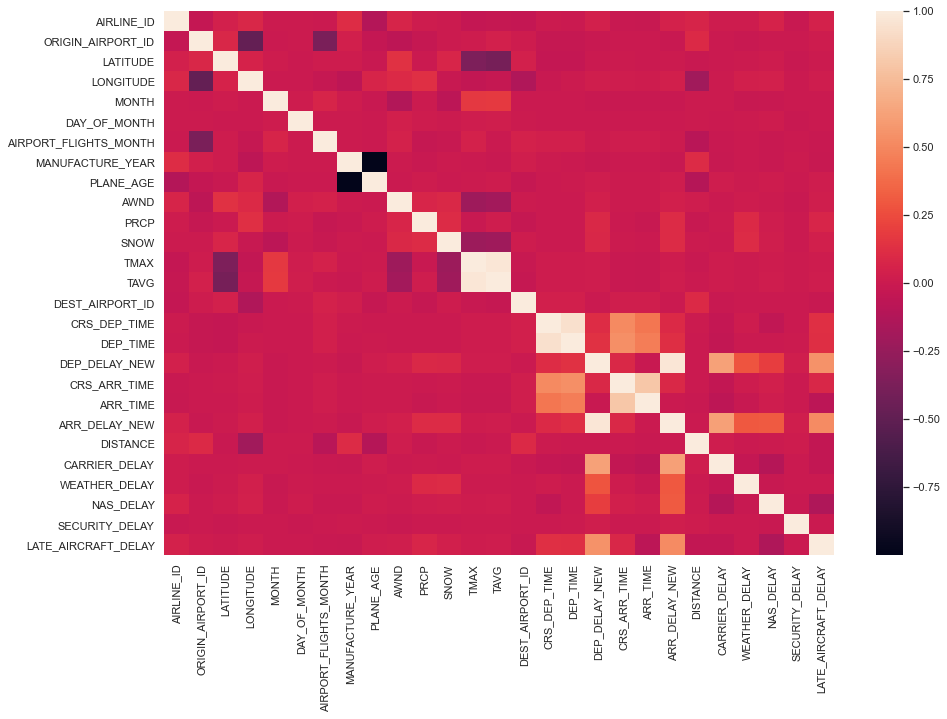

In [12]:
import seaborn as sns
sns.set(font_scale=40)  # crazy big
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(a.corr())